### **Đồ án Final - Toán ứng dụng và Thống kê - Applied Mathematics and Statistics**

### **Phần 1: Tối ưu lồi - Data Fitting**

#### 1. Import các thư viện cần thiết

In [60]:
import pandas as pd 
import matplotlib.pyplot as plt
import math
import copy

### 2. Đọc dữ liệu từ file CSV

In [61]:
df = pd.read_csv('data/customer_purchase_behaviors.csv')
df.head()

,user_id,age,annual_income,purchase_amount,loyalty_score,region,purchase_frequency
0,1,25,45000,200,4.5,North,12
1,2,34,55000,350,7.0,South,18
2,3,45,65000,500,8.0,West,22
3,4,22,30000,150,3.0,East,10
4,5,29,47000,220,4.8,North,13


#### Mô tả đầu vào (input) và đầu ra (output) của mô hình cần được xây dựng.

- Đầu vào của mô hình (input) là: 'age', 'annual_income', 'purchase_amount', 'purchase_frequency'

- Đầu ra của mô hình (output) là: 'loyalty_score'

#### Danh sách các input và output:

In [62]:
list_feature_name = ['age', 'annual_income', 'purchase_amount', 'purchase_frequency']
output_model_name = ['loyalty_score']

#### Vẽ biểu đồ phân tán của dữ liệu

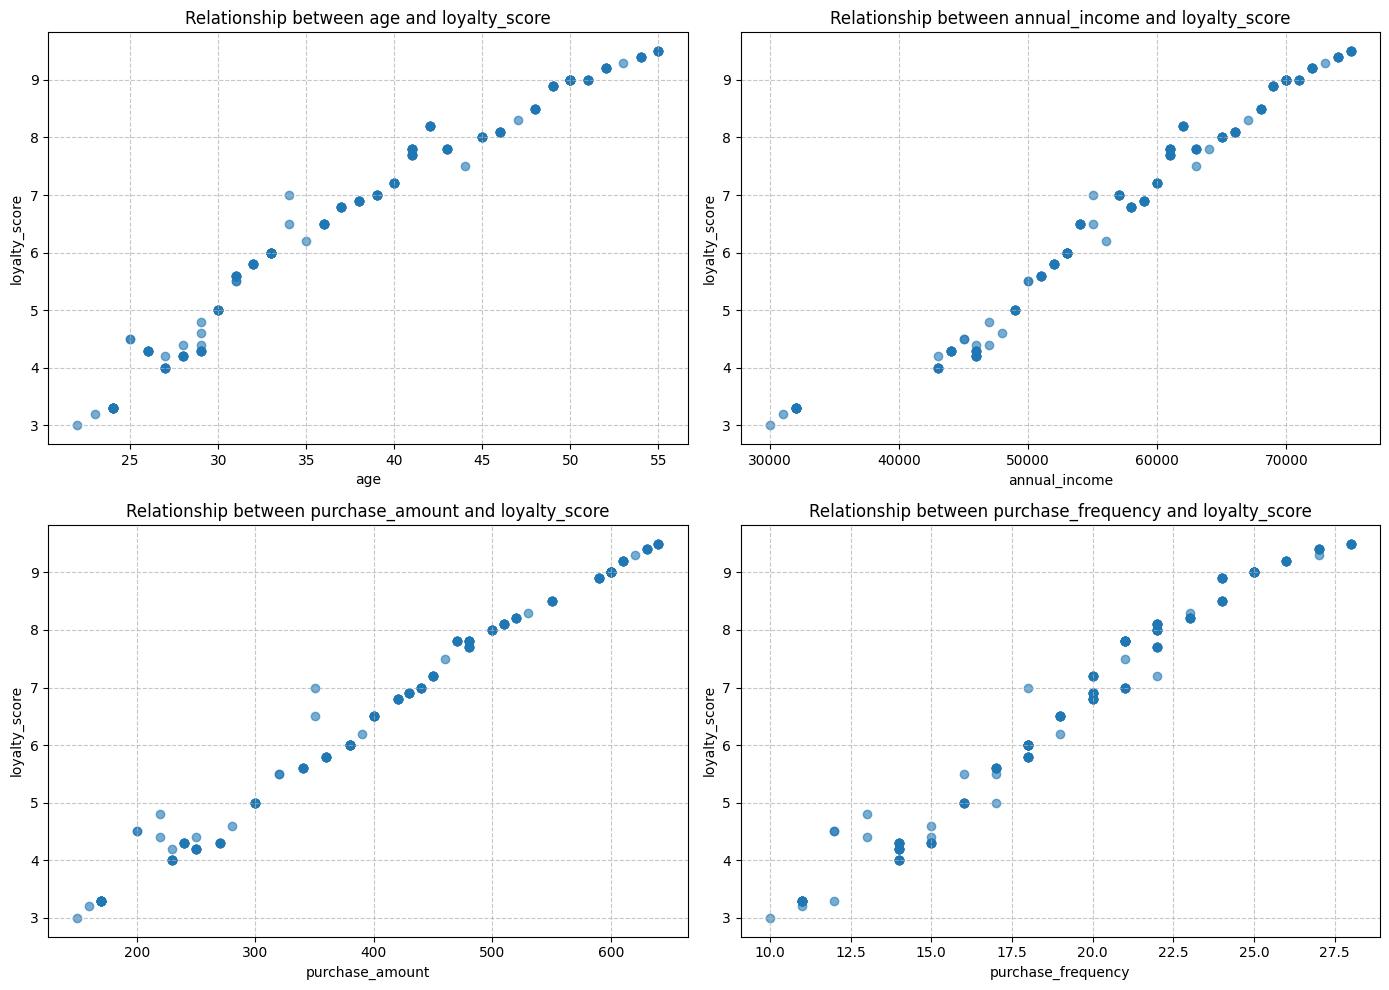

In [63]:
# x_point = df['age']
# y_point = df['loyalty_score']

plt.figure(figsize=(14, 10))

for i, x in enumerate(list_feature_name):
    plt.subplot(2, 2, i+1)
    x_point = df[x]
    y_point = df[output_model_name[0]]
    
    plt.scatter(x_point, y_point, alpha=0.6)
    plt.title(f'Relationship between {x} and {output_model_name[0]}')
    plt.xlabel(x)
    plt.ylabel(output_model_name[0])
    plt.grid(True, linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()


### 3. Tạo các hàm hỗ trợ trong việc train mô hình

#### Tạo ma trận toàn số 0

- Hàm này sẽ tạo ra một ma trận có kích thước (m, n) với tất cả các giá trị là 0.

In [64]:
def create_zero_matrix(n_row, n_col):
    return [[0 for _ in range(n_col)] for _ in range(n_row)]

#### Chuyển vị ma trận

- Hàm này sẽ tạo ra một ma trận chuyển vị của ma trận đầu vào.

Ví dụ:
${A} = \begin{bmatrix} 1 & 2 \\ 3 & 4 \end{bmatrix}$
$ \Rightarrow $
${A}^T = \begin{bmatrix} 1 & 3 \\ 2 & 4 \end{bmatrix}$

In [65]:
def transpose_matrix(matrix):
	n_row = len(matrix)
	n_col = len(matrix[0])
 
	matrix_trans = create_zero_matrix(n_col, n_row)
	
	for i in range(n_row):
		for j in range(n_col):
			matrix_trans[j][i] = matrix[i][j]
			
	return matrix_trans

#### Nhân 2 ma trận

- Hàm này sẽ nhân 2 ma trận với nhau.
- Lưu ý: Số cột của ma trận A phải bằng số dòng của ma trận B.

In [66]:
def multiply_matrix(matrix_A, matrix_B):
    # tao ra ma tran ket qua co kich thuoc la so cot cua ma tran A va so dong cua ma tran B
    result_matrix = [[0 for _ in range(len(matrix_B[0]))] for _ in range(len(matrix_A))]
    
    m_row_A = len(matrix_A)
    n_col_B = len(matrix_B[0])
    
    if (len(matrix_A[0]) != len(matrix_B)):
        raise ValueError("Number of columns in matrix A must be equal to number of rows in matrix B")
    
    for i_row in range(m_row_A):
        for i_col in range(n_col_B):
            total = 0
            for i,a in enumerate(matrix_A[i_row]):
                total += a*matrix_B[i][i_col]
            result_matrix[i_row][i_col] = total
    
    return result_matrix

#### Nhân ma trận với hằng số cho trước

- Hàm này sẽ nhân tất cả các phần tử của ma trận với một hằng số cho trước.

In [67]:
def multiply_scalar_matrix(scalar, A_list):
    return [[scalar * a for a in a_row] for a_row in A_list]

#### Tính định thức của ma trận

- Hàm này sẽ tính định thức của một ma trận vuông.

- Để tính định thức của ma trận, ta sẽ xây dựng hàm `create_submatrix` để xây dựng một ma trận có được bằng cách xóa đi dòng và cột. Sau đó sẽ xây dựng hàm `determinant` để tìm định thức.

In [68]:
def create_submatrix(A, i_row, i_col):
    sub_A = copy.deepcopy(A)
    
    # Bỏ dòng
    sub_A = sub_A[:i_row] + sub_A[i_row+1:]
    
    # Bỏ cột
    n_row_sub = len(sub_A)
    for i in range(n_row_sub): 
        sub_A[i] = sub_A[i][:i_col] + sub_A[i][i_col+1:]
        
    return sub_A

# Dành cho ma trận vuông
def determinant(A):
    # Trường hợp cơ bản, định thức của ma trận 1x1
    if len(A) == 1 and len(A[0]) == 1:
        return A[0][0]
    
    total = 0
 
    # Duyệt qua từng cột để loại bỏ
    for i_col in range(len(A[0])):
        sub_A = create_submatrix(A, 0, i_col)
 
        # Tìm dấu
        sign = (-1) ** (i_col)
        
        # Gọi đệ quy cho các ma trận con
        sub_det = determinant(sub_A)
        
        # Cộng dồn định thức khi bỏ cột i_col
        total += sign * A[0][i_col] * sub_det 
 
    return total

#### Nghịch đảo ma trận

- Hàm này sẽ tính ma trận nghịch đảo của một ma trận vuông.
- Để tính ma trận nghịch đảo, ta sẽ sử dụng công thức:

$$
A^{-1} = \frac{1}{\text{det}(A)} \cdot \text{adj}(A)$$
- Trong đó, $\text{adj}(A)$ là ma trận phụ hợp của ma trận $A$ (Được tạo từ `create_submatrix`).



In [69]:
# Cho ma trận vuông
def inverse(A):
    n_row = len(A)
    n_col = len(A[0])
    
    # Tính định thức cho ma trận
    det_A = determinant(A)
    
    # Trả về None khi ma trận không khả nghịch
    if det_A == 0:
        raise ValueError('Matrix irreversible')
        return None
    
    # Xử lý trường hợp ma trận cấp 1
    if n_row == 1 and n_col == 1:
        return 1/det_A
    
    # Tạo ma trận kết quả
    A_res = [[0 for _ in range(n_col)] for _ in range(n_row)]
    
    # A_res = adj(A)/det_A
    # B1: Chuyển vị ma trận gốc
    A_trans = transpose_matrix(A)
    
    # B2: Tính adj(A) đồng thời gán kết quả vào A_res
    for i_row in range(n_row):
        for i_col in range(n_col):
            # Tạo ra các ma trận con
            sub_A = create_submatrix(A_trans, i_row, i_col)
 
            # Tìm dấu
            sign = (-1) ** (i_row + i_col)
            
            A_res[i_row][i_col] = sign * determinant(sub_A)
 
    # B3: Chia định thức
    A_res = multiply_scalar_matrix(1/det_A, A_res)
    
    return A_res

### 4. Tạo ma trận input và output

- Dựa trên dữ liệu đã đọc từ file CSV và input/output đã mô tả ở trên, ta sẽ tạo ma trận input và output.

In [70]:
X_train = df[list_feature_name]
y_train = df[output_model_name]

In [71]:
X_train.head()

,age,annual_income,purchase_amount,purchase_frequency
0,25,45000,200,12
1,34,55000,350,18
2,45,65000,500,22
3,22,30000,150,10
4,29,47000,220,13


In [72]:
y_train.head()

,loyalty_score
0,4.5
1,7.0
2,8.0
3,3.0
4,4.8


#### Thêm số 1 vào cột đầu tiên của ma trận input

- Để tính toán hệ số hồi quy tuyến tính, ta cần thêm một cột số 1 vào đầu ma trận input để đại diện cho hằng số trong mô hình.

In [73]:
# Thêm cột 1 vào đầu các ma trận X
X_train_with_bias = X_train.copy()
X_train_with_bias.insert(0, 'bias', 1)

# chuyen dataframe -> list
X_train_matrix = X_train_with_bias.values.tolist()
y_train_matrix = y_train.values.tolist()

# X_train_matrix

### Tính kích thước hàm mất mát

- Để hàm mất mát $L(w)$ đạt giá trị nhỏ nhất, ta cần tính kích thước của hàm mất mát $w$. 

- w được tính bằng công thức:
$$
w = (X^T \cdot X)^{-1} \cdot X^T \cdot y
$$

In [74]:
xTx = multiply_matrix(transpose_matrix(X_train_matrix), X_train_matrix)
xTx_tru_1 = inverse(xTx)
xTy = multiply_matrix(transpose_matrix(X_train_matrix), y_train_matrix)

w = multiply_matrix(xTx_tru_1, xTy)

w

[[0.5554059697801677],
 [0.005043673437925944],
 [3.465115049702122e-05],
 [0.012306224068657556],
 [-0.059777759380267526]]

#### Hiển thị phương trình hồi quy tuyến tính

- Dựa trên hệ số hồi quy tuyến tính $w$ đã tính được, ta sẽ hiển thị phương trình hồi quy tuyến tính dưới dạng:
$$
y = w_0 + w_1 \cdot x_1 + w_2 \cdot x_2 + ... + w_n \cdot x_n
$$

In [75]:
print("Phương trình hồi quy tuyến tính:")
print(f'Y = {round(w[0][0], 6)} + {round(w[1][0], 6)} * {list_feature_name[0]} + {round(w[2][0], 6)} * {list_feature_name[1]} + {round(w[3][0], 6)} * {list_feature_name[2]} + {round(w[4][0], 6)} * {list_feature_name[3]}')

Phương trình hồi quy tuyến tính:
Y = 0.555406 + 0.005044 * age + 3.5e-05 * annual_income + 0.012306 * purchase_amount + -0.059778 * purchase_frequency


In [76]:
y_pred = []
for row in X_train_matrix:
    prediction = w[0][0] + w[1][0]*row[1] + w[2][0]*row[2] + w[3][0]*row[3] + w[4][0]*row[4]
    y_pred.append(prediction)
    
y_test_list = []

if isinstance(y_train_matrix[0], list):
    y_test_list = [item[0] for item in y_train_matrix]
else:
    y_test_list = y_train_matrix

# Tính MSE (Mean Squared Error)
mse = sum([(y_pred[i] - y_test_list[i])**2 for i in range(len(y_pred))]) / len(y_pred)
print(f"Mean Squared Error on training data: {mse:.4f}")

Mean Squared Error on training data: 0.0370


#### Vẽ đồ thì phân tán

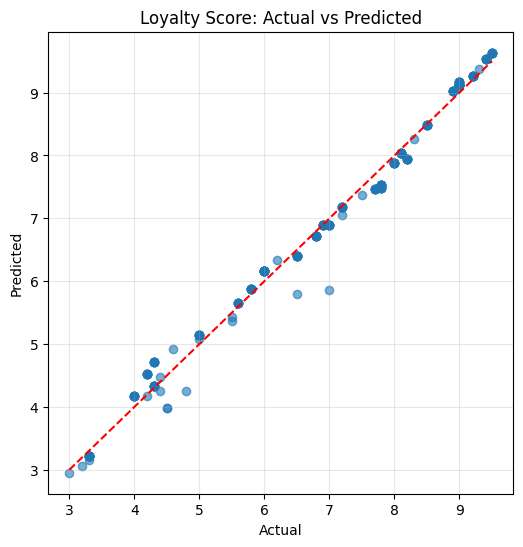

In [77]:
# Vẽ đồ thị phân tán giữa giá trị thực tế và dự đoán
plt.figure(figsize=(6, 6))
plt.scatter(y_test_list, y_pred, alpha=0.6)
plt.plot([min(y_test_list), max(y_test_list)], [min(y_test_list), max(y_test_list)], 'r--')
plt.title('Loyalty Score: Actual vs Predicted')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.grid(True, alpha=0.3)
plt.show()

### Câu 2

- Xét mô hình hồi quy tuyến tính $y = w_0 + w_1x_1$ chỉ sử dụng 1 đặc trưng duy nhất, hãy tìm đặc trưng mà mô
hình hồi quy tuyến tính thể hiện tốt nhất
- Dựa theo các bước đã thực hiện ở trên, ta sẽ lặp qua từng đặc trưng trong ma trận input và tính toán hệ số hồi quy tuyến tính cho từng đặc trưng. Sau đó, ta sẽ so sánh giá trị của hàm mất mát để tìm ra đặc trưng tốt nhất.
- Trước hết thì em sẽ gói tất cả các bước ở trên câu 1 vào trong một hàm `train_model` để có thể tái sử dụng lại.

In [78]:
for name_of_feature in list_feature_name:
    X_train= df[[name_of_feature]]
    y_train = df[output_model_name]
    
    X_train_with_bias = X_train.copy()
    X_train_with_bias.insert(0, 'bias', 1)

    # chuyen dataframe -> list
    X_train_matrix = X_train_with_bias.values.tolist()
    y_train_matrix = y_train.values.tolist()
    
    xTx = multiply_matrix(transpose_matrix(X_train_matrix), X_train_matrix)
    xTx_tru_1 = inverse(xTx)
    xTy = multiply_matrix(transpose_matrix(X_train_matrix), y_train_matrix)

    w = multiply_matrix(xTx_tru_1, xTy)
    
    print(f"Phương trình hồi quy tuyến tính với đặc trưng: {name_of_feature}")
    print(f'Y = {round(w[0][0], 6)} + {round(w[1][0], 6)} * {list_feature_name[0]} ')
    
    y_pred = []
    for row in X_train_matrix:
        prediction = w[0][0] + w[1][0]*row[1]
        y_pred.append(prediction)
        
    y_test_list = []

    if isinstance(y_train_matrix[0], list):
        y_test_list = [item[0] for item in y_train_matrix]
    else:
        y_test_list = y_train_matrix

    # Tính MSE (Mean Squared Error)
    mse = sum([(y_pred[i] - y_test_list[i])**2 for i in range(len(y_pred))]) / len(y_pred)
    print(f"Mean Squared Error on training data: {mse:.4f}")

    
    print('\n')

Phương trình hồi quy tuyến tính với đặc trưng: age
Y = -0.917717 + 0.199393 * age 
Mean Squared Error on training data: 0.1293


Phương trình hồi quy tuyến tính với đặc trưng: annual_income
Y = -2.61616 + 0.000164 * age 
Mean Squared Error on training data: 0.1115


Phương trình hồi quy tuyến tính với đặc trưng: purchase_amount
Y = 1.05653 + 0.01348 * age 
Mean Squared Error on training data: 0.0419


Phương trình hồi quy tuyến tính với đặc trưng: purchase_frequency
Y = -1.338628 + 0.41078 * age 
Mean Squared Error on training data: 0.0928




### Kết luận về đặc trưng tốt nhất

Từ kết quả phân tích các đặc trưng riêng lẻ, ta có thể thấy rằng:

$$\text{Feature: purchase\_amount}$$ 

$$Y = 1.05653 + 0.01348 \times \text{purchase\_amount}$$

$$\text{MSE} = 0.0419$$

Đặc trưng **purchase_amount** cho kết quả MSE thấp nhất (0.0419), do đó đây là đặc trưng mà mô hình hồi quy tuyến tính đơn biến thể hiện tốt nhất trong việc dự đoán loyalty_score.

### Câu 3

Sinh viên hãy thiết kế một mô hình hồi quy tuyến tính khác với những mô hình trên mà cho kết quả tốt nhất.
Lưu ý, ta chỉ cần tính chất “tuyến tính” cho các tham số wi, còn xi có thể ở bất kì dạng nào. Do đó, các bạn
có thể thay đổi xi tuỳ ý, ví dụ x1 thành x21 hay √x1, miễn là mô hình các bạn có thể đạt được kết quả tốt hơn
những mô hình ở câu (c) và (d).

Ở đây, em sẽ chọn tham số $x_i$ là $\sqrt{x_i}$ của các đặc trưng trong ma trận input.

In [79]:
df['age_sqrt'] = df['age'] ** 0.5
df['annual_income_sqrt'] = df['annual_income'] ** 0.5
df['purchase_amount_sqrt'] = df['purchase_amount'] ** 0.5
df['purchase_frequency_sqrt'] = df['purchase_frequency'] ** 0.5

list_feature_name = ['age_sqrt', 'annual_income_sqrt', 'purchase_amount_sqrt', 'purchase_frequency_sqrt']

#### Kiểm tra dũ liệu

In [80]:
df['age_sqrt'].head()

0    5.000000
1    5.830952
2    6.708204
3    4.690416
4    5.385165
Name: age_sqrt, dtype: float64

In [81]:
df['age'].head()

0    25
1    34
2    45
3    22
4    29
Name: age, dtype: int64

Tiến hành train mô hình với dữ liệu $\sqrt{x_i}$. Các bước tiến hành tương tự như ở trên

Tạo bộ dữ liệu tran và test

In [82]:
X_train= df[list_feature_name]
y_train = df[output_model_name]

X_train_with_bias = X_train.copy()
X_train_with_bias.insert(0, 'bias', 1)

# chuyen dataframe -> list
X_train_matrix = X_train_with_bias.values.tolist()
y_train_matrix = y_train.values.tolist()

xTx = multiply_matrix(transpose_matrix(X_train_matrix), X_train_matrix)
xTx_tru_1 = inverse(xTx)
xTy = multiply_matrix(transpose_matrix(X_train_matrix), y_train_matrix)

w = multiply_matrix(xTx_tru_1, xTy)

print("Phương trình hồi quy tuyến tính:")
print(f'Y = {round(w[0][0], 6)} + {round(w[1][0], 6)} * {list_feature_name[0]} + {round(w[2][0], 6)} * {list_feature_name[1]} + {round(w[3][0], 6)} * {list_feature_name[2]} + {round(w[4][0], 6)} * {list_feature_name[3]}')

y_pred = []
for row in X_train_matrix:
    prediction = w[0][0] + w[1][0]*row[1] + w[2][0]*row[2] + w[3][0]*row[3] + w[4][0]*row[4]
    y_pred.append(prediction)
    
y_test_list = []

if isinstance(y_train_matrix[0], list):
    y_test_list = [item[0] for item in y_train_matrix]
else:
    y_test_list = y_train_matrix

# Tính MSE (Mean Squared Error)
mse = sum([(y_pred[i] - y_test_list[i])**2 for i in range(len(y_pred))]) / len(y_pred)
print(f"Mean Squared Error on training data: {mse:.4f}")

Phương trình hồi quy tuyến tính:
Y = -5.085653 + 1.025149 * age_sqrt + -0.000593 * annual_income_sqrt + 0.388623 * purchase_amount_sqrt + -0.498458 * purchase_frequency_sqrt
Mean Squared Error on training data: 0.0331


Với kết quả sử dụng $\sqrt{x_i}$, kết quả thu được của MSE là 0.0331, thấp hơn so với mô hình hồi quy tuyến tính đơn biến sử dụng đặc trưng purchase_amount (MSE = 0.0419) và mô hình hồi quy tuyến tính đa biến (MSE = 0.0352). Điều này cho thấy việc sử dụng $\sqrt{x_i}$ đã cải thiện đáng kể độ chính xác của mô hình.

#### Test


In [83]:
a = [[1,2,3],
     [4,5,6],
     [7,8,9]]
b = [[5],
    [2],
    [3]]

r = multiply_scalar_matrix(5, a)
r

[[5, 10, 15], [20, 25, 30], [35, 40, 45]]

In [84]:
list_feature_name = ['purchase_frequency']
X_train = df[list_feature_name]
y_train = df[output_model_name[0]]
X_train_with_bias = X_train.copy()
X_train_with_bias.insert(0, 'bias', 1)

X_train_matrix = X_train_with_bias.values.tolist()

y_train_matrix = [[val] for val in y_train.values.tolist()]

xTx = multiply_matrix(transpose_matrix(X_train_matrix), X_train_matrix)

# det_xTx = determinant(xTx)
# det_xTx
xTx_tru_1 = inverse(xTx)
xTy = multiply_matrix(transpose_matrix(X_train_matrix), y_train_matrix)

# w = multiply_matrix(xTx_tru_1, xTy)

# # print("Phương trình hồi quy tuyến tính:")
# # print(f'Y = {round(w[0][0], 6)} + {round(w[1][0], 6)} * {list_feature_name[0]}')

# w